In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("image save:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 머신러닝 (Machine + Learning)

그냥 기계(가) 학습(하는 거). 미래 행동 결과 예측. - 뭐가 더 필요해?

+ ML에서 Machine은 Function(함수)와 Tree(트리)

#### 종류

* (지도, 비지도, 준지도, 강화 학습) - 감독 여부

* (온라인 학습과 배치 학습) - 실시간 점진적 학습 여부

* (사례 기반 학습과 모델 기반 학습) ? - 단순 데이터 비교인지 패턴을 발견하는지

### Data Analytics 과 Machine Learning

Data Analytics
- 과거 행동의 특징 확인
- EDA(Exploratory Data Analysis, 탐색적 데이터 분석) 진행
  - 본격적인 모델링에 들어가기 앞서 반드시 선행되어야하는 과정
  - 히스토그램, 산점도, 상관관계표 등 다양한 시각화 방법을 사용함

In [17]:
'''
지도학습과 비지도 학습
종류	                알고리즘(Algorithm
------------------------------------------------------------------
지도학습
(Supervised Learning)	  - 회귀분석(Regression Analysis), 수치예측
                        - 로지스틱 회귀(Logistic Regression), 분류
                        - 의사결정 나무(Decision Tree)
                        - 랜덤 포레스트(Random Forest)
                        - 신경망(Neural Network)
------------------------------------------------------------------
비지도학습
(Unsupervised Learning)	- 주성분 분석(Principal Component Analysis)
                        - K-평균 군집(K-means Clustering)
                        - 연관 규칙(Association Rules)|'''

'\n지도학습과 비지도 학습\n종류\t                알고리즘(Algorithm\n------------------------------------------------------------------\n지도학습\n(Supervised Learning)\t  - 회귀분석(Regression Analysis), 수치예측\n                        - 로지스틱 회귀(Logistic Regression), 분류\n                        - 의사결정 나무(Decision Tree)\n                        - 랜덤 포레스트(Random Forest)\n                        - 신경망(Neural Network)\n------------------------------------------------------------------\n비지도학습\n(Unsupervised Learning)\t- 주성분 분석(Principal Component Analysis)\n                        - K-평균 군집(K-means Clustering)\n                        - 연관 규칙(Association Rules)|'

#### 참고

**데이터 라벨링(Data Labeling)**

AI 학습을 위해 데이터를 가공하는 것 라벨이 없는 데이터에 사람이 직접 라벨을 붙이는 활동

**데이터 댐(Data Dam)**

데이터 수집부터 데이터를 축적ㆍ가공하고 이를 거래하거나 AI에 활용하기 위한 전반의 사업

## **경사하강법(Gradient Descent)**

함수에서 파라미터에 기울기(경사)를 빼면서 하강하여 오차값의 최소가 되는 지점에 이를 때까지 반복시키는 방법

어느 지점이든 미분값을 빼주기만 하면, 오차가 작은 방향으로 이동할 것임.

$y_i - \hat{y_i}$ = 오차 (Error, Loss, Cost)

MSE(Mean Squared Error) = ${y_i - \hat{y_i}}^2 = {y_i - (wx + b)}^2$ -> 제곱하는 이유는 $\pm$ 때문

In [18]:
def Machine(x, w, b):
  y_hat = (w * x) + b
  return y_hat
# y^ = wx + b

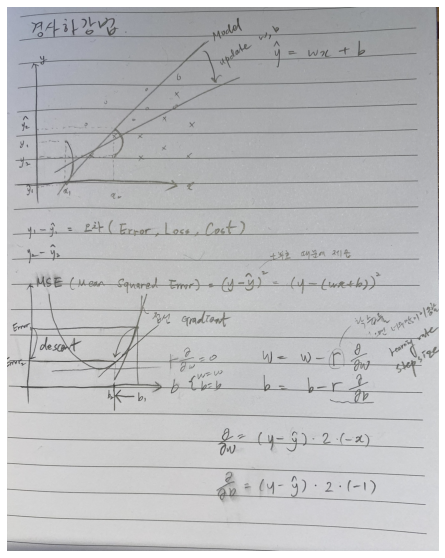

In [19]:
filename = "gradient_descent.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

## **모델 평가(Model Validation)**

만든 모델이 실제로 사용하기에 적합한지 확인(검증)하는 작업

#### **일반화**
Model 생성(학습) 시 사용되지 않은 데이터에서도 유사한 성능 보유하게 하는 것

* Train Error, Test Error의 차이가 크지 않음(Non overfitting)

#### **교차검증**

##### 과정
* Training Data로 학습을 진행하고, Validation Data에 대해 성능을 측정하여 최적 parameter를 찾음
* 최적 parameter로 모델을 학습시킨 후 Testing Data에 검증을 수행함

##### 특징
* 데이터를 Training, Testing로 나누어 학습한 방법도 Testing가 모델 평가과정에서 사용되는 문제 발생하기 때문
* sklearn을 통해 데이터를 분리할 경우 한번에 나눌 수 없기 때문에 두 차례로 나눠서 진행해야 함

#### **오차 행렬**

클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것

##### **정밀도(Precision)와 재현율(Recall)**

양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 더 중요할 때 사용

$
\text{정밀도} = \frac{\text{진짜 양성}}{\text{진짜 양성} + \text{거짓 양성}}$

$
\text{재현율} = \frac{\text{진짜 양성}}{\text{진짜 양성} + \text{거짓 음성}}$

**F1-Score - Precision과 Recall의 조화 평균**

$
F_1 = \frac{2}{\frac{1}{\text{정밀도}} + \frac{1}{\text{재현율}}} $ 

##### **정밀도/재현율 트레이드오프**

결정 함수를 사용해 각 샘플의 점수 계산. 이 점수가 임곗값보다 크면 샘플을 양성 클래스에 할당하고

그렇지 않으면 음성 클래스에 할당.

정밀도/재현율 트레이드오프 이미지는 분류기가 만든 점수 순으로 나열됨.

선택한 결정 임곗값 위의 것을 양성으로 판단.

#### **수신기 조작 특성(ROC) 곡선**

민감도(재현율)에 대한 1-특이도 그래프, PR(정밀도와 재현율) 사용조건의 반대

$\text{특이도}(FPR)=1-\frac{\text{진짜 음성}}{\text{거짓 양성}+\text{진짜 음성}} $

## **회귀 분석(Regression Analysis)**

과거의 결과값을 기준으로 미래의 결과값(수치)을 예측하는 방법(Model)

* 미래에 발생할 결과값이 과거의 평균으로 돌아간다(회귀)는 의미
* 회귀 모델($\hat{y}=wx+b$)을 사용하여 w와 b의 값을 추정
* 지도 학습의 일종
* 변수
  * x값에 따라 y값이 결정됨
  * 독립변수, 설명변수 : x
  * 종속변수, 반응변수 : y

#### 회귀 분석의 종류

1) 단일 회귀 분석 - Output(y)에 영향을 주는 Input(x)이 1개인 경우

* $y = wx + b$
* $y = w_1x^2 + w_1x + b$


2) 다중 회귀  - Input(x)이 여러 개인 경우(y는 1개)

3) 로지스틱 회귀 분석 - 확률값을 계산하여 분류

#### 회귀 분석 평가 지표

1) 상관계수(Correlation Coefficient)

x와 y의 관계를 확인하는 지표
$x_1$ 과 $x_2$ 의 관계를 확인하는 지표(다중회귀분석)

$−1 \le r \le 1$
* −1 : 음의 상관 관계
* 0 : 상관 관계 없음
* 1 : 양의 상관 관계

2) 결정계수(Coefficient of determination)

MSE와 함께 예측 모델의 평가 지표
“자동차의 무게와 연비의 관계에서, 무게로 연비를 설명할 수 있는가?”

$0 \le R^2 \le 1$

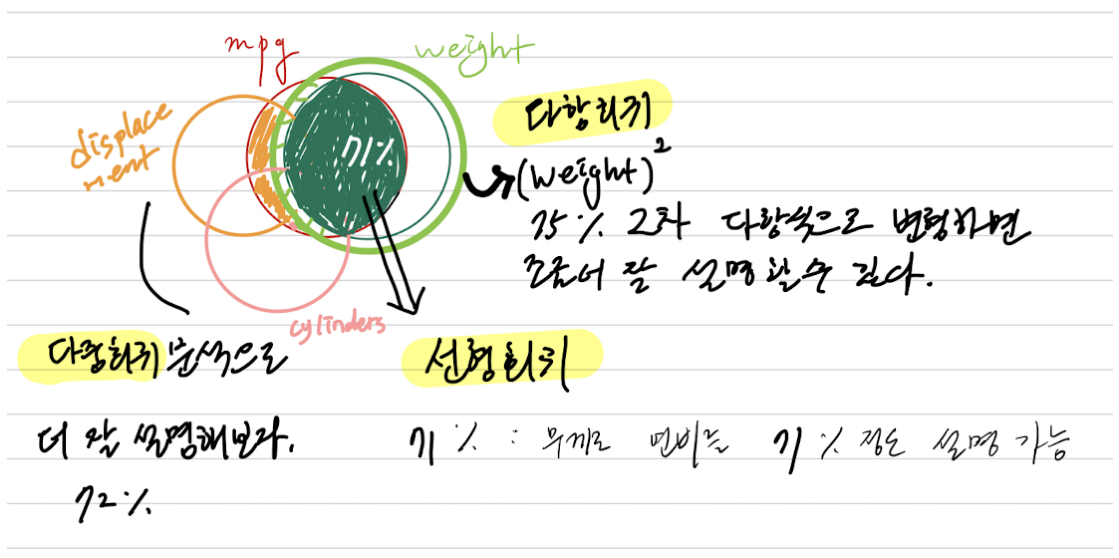

In [20]:
filename = "r_squared.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

* 다중 회귀 분석이 마냥 좋은 것은 아니다. 설명하는 부분이 같거나 중복되는 경우(이미 설명한 부분을 또 설명하는 꼴) 다중회귀분석 결과가 낮을 수도 있다.

### 스케일링(Scaling) - 변수(Feature, 특성)의 범위 조정

* 연속형 변수가 다양한 범위로 존재할 때 제곱 오차 계산 시 왜곡이 발생함
* 범위가 더 큰 변수에 맞추어서 가중치를 최적화(학습)하는 문제가 발생함
* 범위(Scale)가 다른 변수들의 범위를 비슷하게 맞추어야 편향과 계산량을 줄일 수 있음
* 정규화, 표준화 2가지 방법이 있음
* 정규화를 하나 표준화를 하나(Scale이 변해도) 데이터의 분포를 따라감

#### 1) 정규화(Normalization) - MinMaxScaler()
변수의 스케일을 0 ~ 1 사이 범위로 맞추는 것(Min-Max Scaling)

* 변수의 범위가 정해진 값이 필요할 때 유용하게 사용됨

$
X-Normalization = \frac{X - min(X)}{max(X)-min(X)} $

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_Norm = scaler.fit_transform(X)

##### 유의사항 

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

* X에 관해서만 정규화를 진행한다.
* train data를 fit 시켜서 train date의 최댓값, 최솟값으로 train, test 데이터를 정규화 한다.

#### 2) 표준화(Standardization) - StandardScaler()

변수의 평균을 0, 표준편차를 1로 만들어 표준정규분포의 특징을 갖도록 함

* 가중치(weight) 학습을 더 쉽게 할 수 있도록 함

$
X-Standardization = \frac{X - mean(X)}{std(X)} $


### Encoding(인코딩)

sklearn에서 ‘문자’를 분석할 수 없기 때문에 ‘숫자’ 형태로 변경하기 위해 인코딩을 진행함

**1) Integer Encoding** 문자형 변수를 숫자형 변수로 변경하여 변수 연산 범위 확대

* from sklearn.preprocessing import LabelEncoder

* 예

  * europe -> 0
  * korea -> 1
  * usa -> 2


**2) One-Hot Encoding**

하나의 값은 True(1)이고, 나머지 값은 False(0)인 인코딩

* from sklearn.preprocessing import OneHotEncoder

* 예
  * europe -> [1, 0, 0]
  * korea -> [0, 1, 0]
  * usa -> [0, 0, 1]

## **로지스틱 회귀(Logistic Regression)**

#### **Logistic**
= Sigmoid, Sigmoid 함수를 사용한다는 의미

= Probability, 0 ~ 1의 값을 가지는 의미

#### **Regression**
선형 회귀에서는 $-\infty \sim +\infty$ 범위의 데이터로부터 $\hat{y} = wx + b$ 을 구하여 연속형 값 
$\hat{y}$ 을 예측

* 로지스틱 회귀는 이진 분류를 이용하여 예측 값이 0 또는 1에 가깝도록 학습하여 0 또는 1에 속할 확률을 구함
* 데이터의 범위를 0∼1 로 만들기 위해 활성화함수를 Sigmoid로 사용함 $\hat{y} = sigmoid(wx + b)$
* 범주형 데이터는 인코딩 필수

#### **Logistic Regression** - Classification(범주 예측) 모델

수치 예측이 아닌 어떤 범주에 속하는지에 대한 예측(확률)을 모델링

* 수치 예측 모델에 Sigmoid() 필터(활성화 함수, Activation Function)를 적용하여 구현
  * 일반적으로 분류기준은 0.5이며 변경 가능함
  * 0.5보다 크면 1, 0.5보다 작으면 0으로 분류
* 분류 결과에 대한 신뢰도 검증 필요(Model Validation)
  * Confusion Matrix(혼돈 행렬)
  * Accuracy(정확도), Precision(정밀도), Recall(재현율)

#### **시그모이드(Sigmoid)**
로지스틱 회귀에서 필터로 사용하는 함수

$
sigmoid(x)= \frac{1}{1+e^{-x}}$

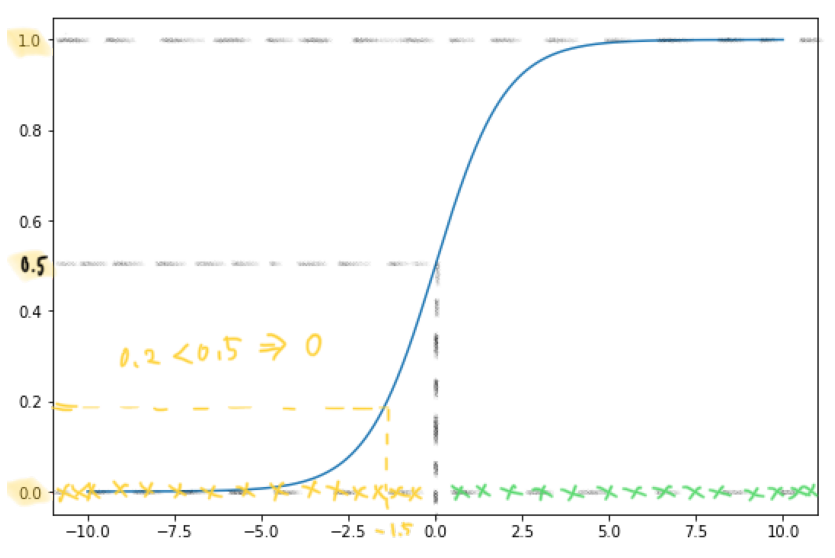

In [21]:
filename = "sigmoid.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

#### **수치 예측 모델에 Sigmoid() 필터 적용**

$
\hat{y}=sigmoid(wx+b)=\frac{1}{1+e^{-wx+b}} $

* w는 기울기, b에 따라 좌우로 이동함

$0 \le \hat{y} \le 1$

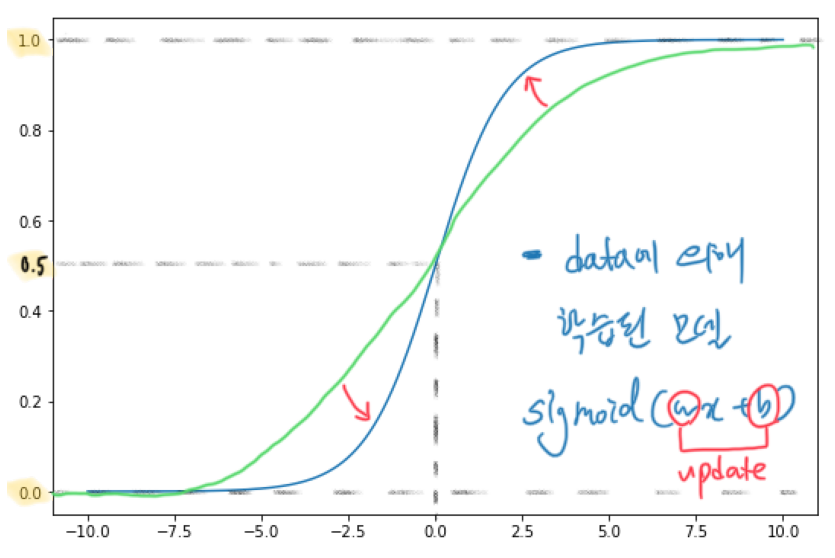

In [22]:
filename = "sigmoid_learn.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

## **Machine Learning Modeling**
**1) Regression**

* 1) Learning(Training) -> MSE(Train Data)
* 2) Validation -> MSE(Test Data)


**2) Classification (Binary, Categorical)**

* 1) Learning -> CEE, MSE(가능하긴 함)
* 2) Validation -> Accuracy, Precision, Recall, F1-Score

## **분류(Classification)**

1) 이진분류(Binary)

2) 다중 분류(Categorical)Permalink


#### Cross Entropy Error

분류에서 경사하강 시 사용하는 오차 함수

* 서로 다른 사건의 확률(Cross)을 곱하여 Entropy를 계산
  * y : 실제값, $\hat{y}$ : 예측값
* Entropy : 불순도

$
-y \cdot \log{\hat{y}}-(1-y) \cdot \log(1-\hat{y})$

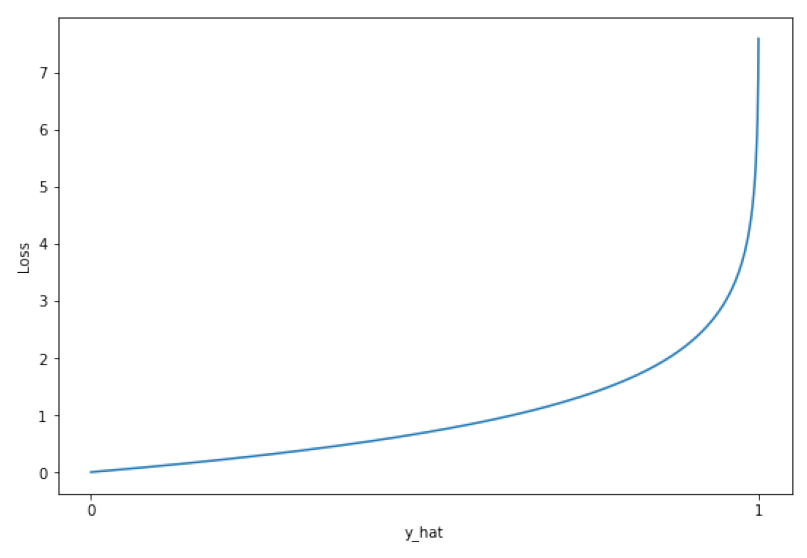

In [23]:
# y=0 일 때
filename = "cee_y0.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

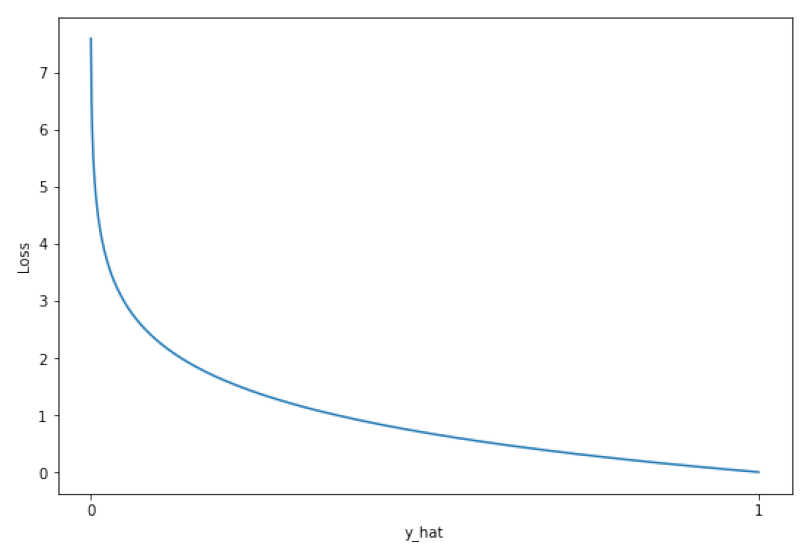

In [24]:
# y=1 일 때
filename = "cee_y1.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

### Information Theory(정보 이론)

##### **Information Theory**
* 자주 발생하지 않는 사건(발생 확률이 적은, 0에 가까운)이 자주 발생하는 사건(발생 확률이 많은, 1에 가까운)보다 전달하는 정보량이 많음
* 정보 희귀성(발생가능성)의 반비례
* 예상하기 어려운 정보에 더 높은 가치를 매기기 때문에 Degree of Surprise(놀람의 정도)가 큼

$
I(x)=-log(P(x))$

##### **Entropy**
* 불확실성의 정도
* 불순도
* Entropy가 낮으면 분류 정확도가 높아짐
* 확률 변수의 평균 정보량(기댓값, 확률의 평균)

$
Entropy = E(-\log{(P(x))})
        = -sum(p(x)* \log{(p(x))})$

* 원래는 p(x)로 같은데, Cross Entropy Error에서는 $y, hat{y}$ 을 사용하므로 Cross가 붙음

### Confusion Matrix(혼돈 행렬) - 분류 모델을 Validation 하는 방법

##### **1) Binary Confusion Matrix**

Positive : 0, Negative : 1

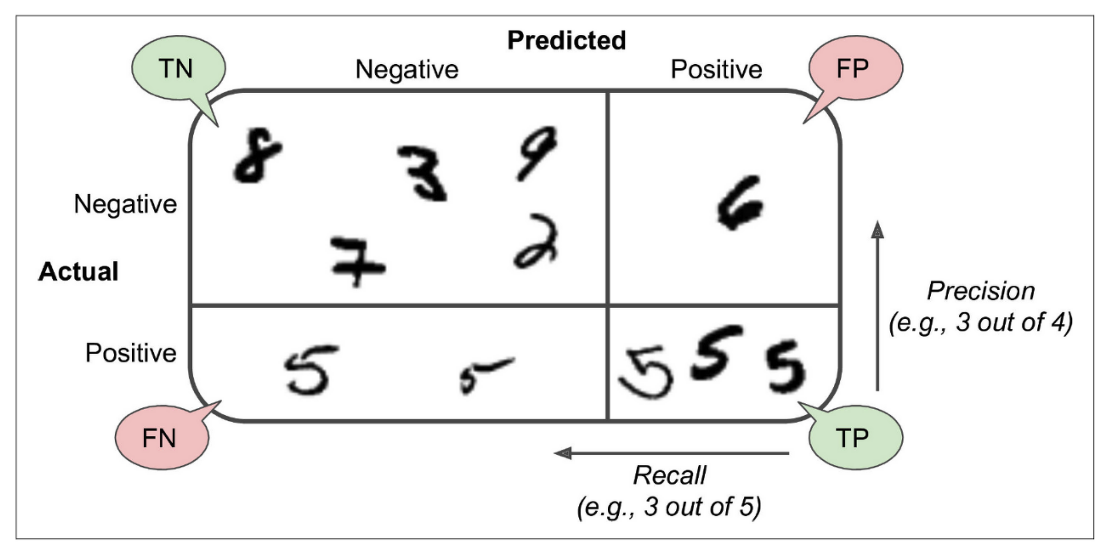

In [25]:
filename = "pre_re.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

##### **Business Impact** - 어떤 일에 대한 부정적인 영향

* Business Impact를 고려하여 모델을 평가해야함
  * Positive
    * 알고 싶은 데이터
    * Positive 선택 시 Business Impact를 고려해야함
  * 예
    * 스팸 메일 필터링
      * 스팸 메일을 확인하고 싶음 -> Spam(Positive)
      * Spam 메일이 Ham 메일로 분류되는 것 보다, Ham 메일이 Spam 메일로 분류되면(Negative -> Positive) 중요 메일을 누락될 수 있으므로Precision이 높은 모델을 만들어야 함
    * 코로나 진단
      * 코로나 양성을 확인하고 싶음 -> 양성(Positive)
      * 음성이 양성으로 분류되는 것 보다, 양성이 음성으로 분류되면(Positive -> Negative) 감염병 전파의 위험이 크므로 Recall이 높은 모델을 만들어야 함

##### **2) Accuracy(정확도)**
Positive와 Negative로 맞게 분류된 데이터의 비율

$
Accracy = \dfrac{TP + TN}{TP + TN + FP + FN} $

##### **3) Precision(정밀도)**
Positive로 분류된 결과 중 실제 Positive의 비율

Negative를 Positive로 틀리게 분류 시 문제가 발생함

$
Precision = \dfrac{TP}{TP +FP}  $

##### **4) Recall(재현율)**
실제 Positive 중에서 Positive로 분류된 비율

Positive를 Negative로 틀리게 분류 시 문제가 발생함

$
Recall = \dfrac{TP}{TP + FN}  $

##### **5) F1-Score**
Precision과 Recall의 조화 평균

Precision과 Recall은 Trade-off 관계

$
F1-Score = \dfrac{2}{\dfrac{1}{Precision}+\dfrac{1}{Recall}} = 2 \times \dfrac{Precision \times Recall}{Precision + Recall} $